# <span style = "color:green; font-size:40px">Satellite image project</span>

### Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import glob
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from skimage.transform import resize

### Fetch the data

In [2]:
cloudy=glob.glob('cloudy/*.jpg')[:1000]
desert=glob.glob("desert/*.jpg")[:700]
green_area=glob.glob('green_area/*.jpg')[:1000]
water=glob.glob('water/*.jpg')[:1000]

### Check the Number of images (cloudy,desert,green_area,water)

In [3]:
print(f'number of images in cloudy is {len(cloudy)}')
print(f'number of images in desert is {len(desert)}')
print(f'number of images in green_area is {len(green_area)}')
print(f'number of images in water is {len(water)}')

number of images in cloudy is 1000
number of images in desert is 700
number of images in green_area is 1000
number of images in water is 1000


### Check the datatype of all images

In [4]:
print(f'Datatype of images in cloudy is {type(cloudy)}')
print(f'Datatype of images in cloudy is {type(desert)}')
print(f'Datatype of images in cloudy is {type(green_area)}')
print(f'Datatype of images in cloudy is {type(water)}')

Datatype of images in cloudy is <class 'list'>
Datatype of images in cloudy is <class 'list'>
Datatype of images in cloudy is <class 'list'>
Datatype of images in cloudy is <class 'list'>


### Create a list with the images and a seperate one with its corresponding labels for all images

In [5]:
images=[]
labels=[]

for i in cloudy:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in desert:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in green_area:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in water:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

### Shuffle both images and labels

In [6]:
images,labels=shuffle(images,labels,random_state=100)

### Plot a few images of all images(cloudy,desert,green_area,water)

In [7]:
classes={0:'cloudy',1:'desert',2:'green_area',3:'water'}

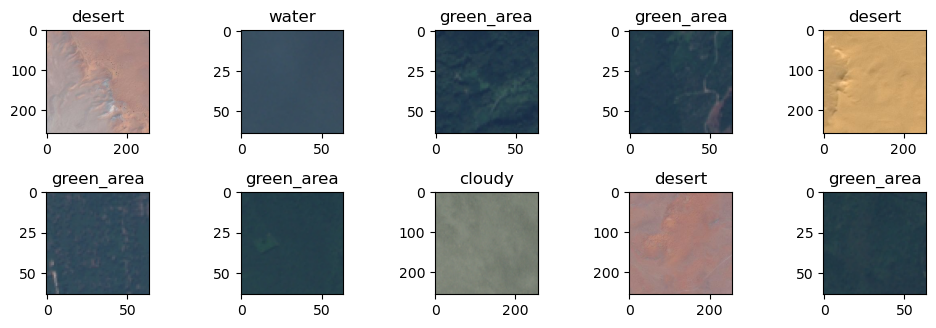

In [8]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()    

### Resize the images to 64X64

In [9]:
x=[]

for i in images:
    x.append(resize(i,(64,64,3)))
x=np.array(x)    

### Plot some of the resized images

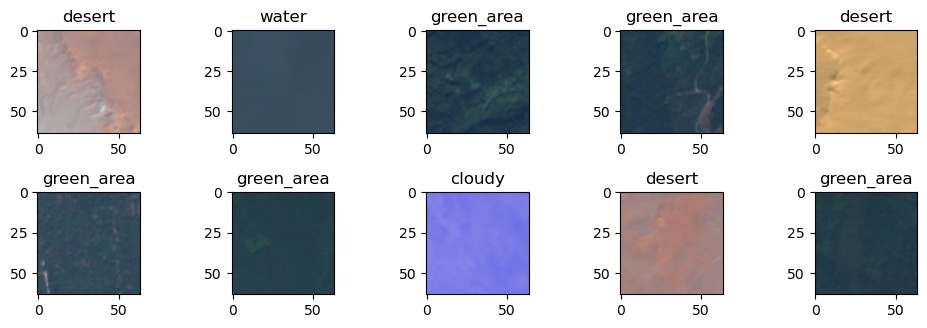

In [10]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i])
    plt.title(classes[labels[i]])
plt.tight_layout()    

### Check the datatype of x and Label

In [11]:
print(f'Datatype of x is {type(x)}')
print(f'Datatype of labels is{ type(labels)}')

Datatype of x is <class 'numpy.ndarray'>
Datatype of labels is<class 'list'>


### Convert label to Numpy array and store it in y 

In [12]:
y=np.array(labels)

In [13]:
type(y)

numpy.ndarray

In [ ]:
### Check the shape of x and y

In [14]:
print(f'Shape of x {x.shape}')
print(f'Shape of y {y.shape}')

Shape of x (3700, 64, 64, 3)
Shape of y (3700,)


### Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

In [15]:
model=RandomForestClassifier()

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

### Compile our model

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Check model summary

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

### Train our model with x and y

In [25]:
model.fit(x,y,epochs=5,validation_split=0.05)

Epoch 1/5


C:\Users\sheri\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


110/110 [==============================] - 7s 51ms/step - loss: 0.0000e+00 - accuracy: 0.2711 - val_loss: 0.0000e+00 - val_accuracy: 0.2541
Epoch 2/5
110/110 [==============================] - 5s 43ms/step - loss: 0.0000e+00 - accuracy: 0.2711 - val_loss: 0.0000e+00 - val_accuracy: 0.2541
Epoch 3/5
110/110 [==============================] - 6s 55ms/step - loss: 0.0000e+00 - accuracy: 0.2711 - val_loss: 0.0000e+00 - val_accuracy: 0.2541
Epoch 4/5
110/110 [==============================] - 8s 73ms/step - loss: 0.0000e+00 - accuracy: 0.2711 - val_loss: 0.0000e+00 - val_accuracy: 0.2541
Epoch 5/5
110/110 [==============================] - 5s 46ms/step - loss: 0.0000e+00 - accuracy: 0.2711 - val_loss: 0.0000e+00 - val_accuracy: 0.2541


### Evaluate our model

In [26]:
model.evaluate(x,y)

116/116 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2703


[0.0, 0.2702702581882477]

### Make predictions with x

In [29]:
prediction=model.predict(x)

116/116 [==============================] - 2s 15ms/step


#### Our prediction is numbers ranging from 0 to 1. We can convert values less than 0.5 to 0 and rest to 1.

In [30]:
pred=[]
for i in prediction:
    if i>0.5:
        pred.append(0)
        
    else:
        pred.append(1)  

### Plot X along with label from our prediction

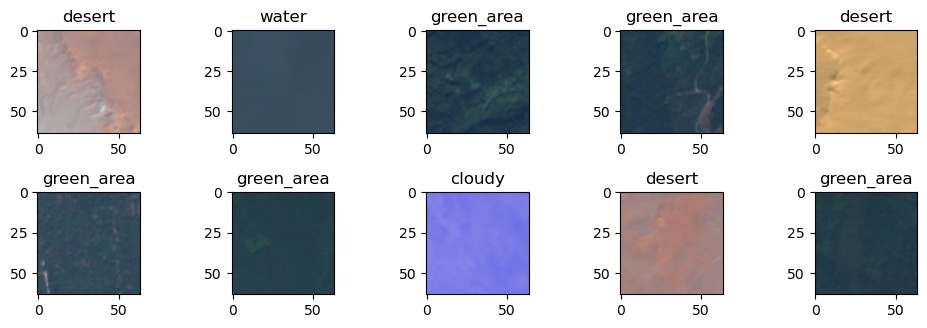

In [32]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i])
    plt.title(classes[labels[i]])
plt.tight_layout()    

### Plot confusion matrix on a heatmap

<Axes: >

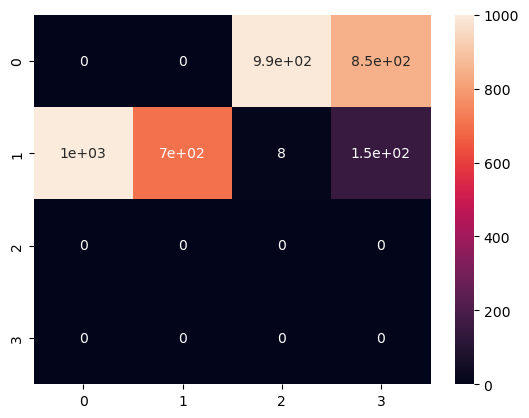

In [35]:
sns.heatmap(confusion_matrix(pred,y),annot=True)